# Análisis exploratorio del dataset seleccionado

El dataset utilizado tiene origen en Kaggle. La idea de este trabajo es realizar el flujo completo automatizado de un proyecto de datascience. Desde el pipeline que comenzará desde la limpieza si es que lo requiere a la selección del modelo más óptimo. También se exprondrá por api.

## Import libraries

In [1]:
import sys
import os
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from src.visualization import visualize
from src.helpers import constans

## Load dataset

In [2]:
df = pd.read_csv('../data/raw/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data insights

### Analizamos la dimensión de nuestros datos

In [9]:
df.shape

(21613, 21)

**Notas:**
- El dataset tiene 21613 observaciones y 21 características.
- Tenemos una variable independiente (Price) y las otro 20 variables dependientes.

#### Realizamos un análisis de las columnas

In [11]:
df.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

#### Analisamos los atributos con los que trabajaremos, su tipo y algunas medidas estadísticas de interes 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


**Nota:**
- Podemos observar que no hay columnas que tengan valores nulos.
- El campo date debe ser del tipo datetime.
- Los campos bedrooms, bathrooms y floors deberian ser enteros.
- La columna Id es un identificador utilizado por la fuente externa de donde se extrajo la información.
- Podemos agregar una columna sobre la antiguedad de la casa.
- Podemso convertir el atributo yr_renovated a un boolean.

## Summary statistics

In [13]:
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


**Notas:**
- La dispersión de los precios es bastante alta.
- Las columnas ´sqft_lot´, ´sqft_basement´ y ´sqft_lot15´ están demasiado dispersas.

## Undestanding variables - Data visualization

### To check missing values 

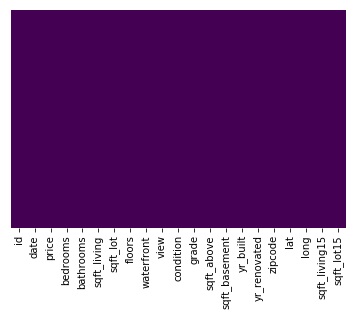

In [19]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')

**Notas:**
- No se observan valores nulos como antes lo habiamos mencionado.

### To check outliers 

In [3]:
columns_list = df.drop(columns=['id', 'date', 'zipcode', 'lat', 'long']).columns.values

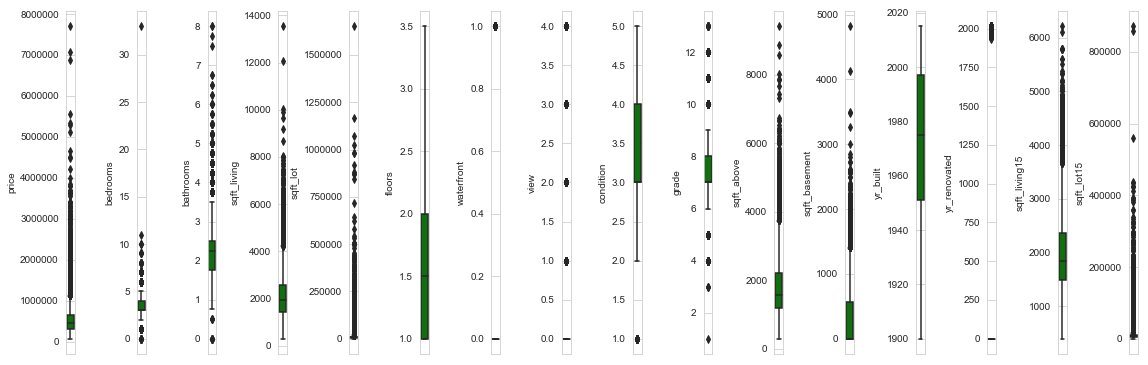

In [6]:
figure_path = os.path.join(constans.OUTPUT_FIGURE_PATH, '01_box_plot_outliers_exploration.png')
visualize.plot_check_outliers_box_plot(df, columns_list, figure_path)

**Notas:**
- Debemos limpiar outliers ya que en el gráfico anteior algunos los tienen.

### To check distribution 

In [3]:
columns_list = df.drop(columns=['id', 'date', 'zipcode', 'lat', 'long']).columns.values

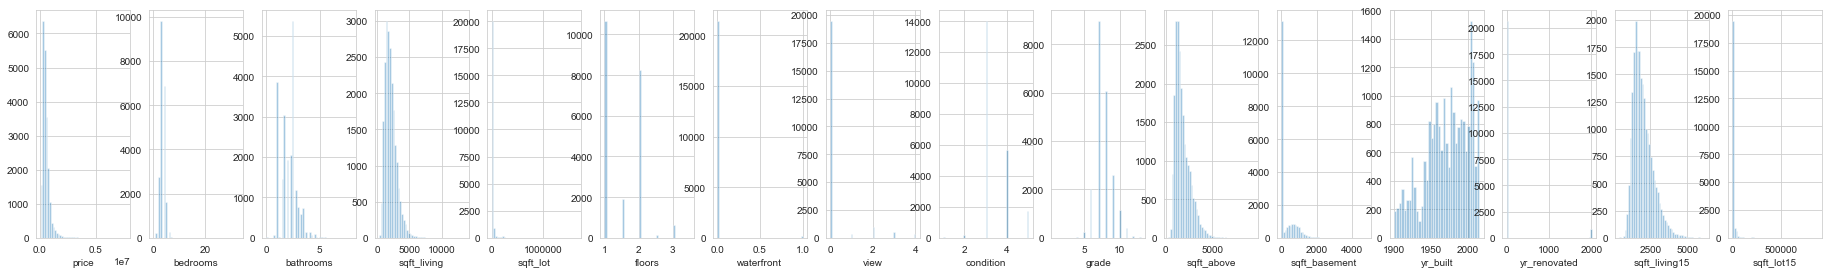

In [5]:
figure_path = os.path.join(constans.OUTPUT_FIGURE_PATH, '02_distribution_exploration.png')
visualize.plot_check_distribution(df, columns_list, figure_path)

### To check correlation 

In [4]:
columns_list = df.drop(columns=['id', 'date', 'zipcode']).columns.values

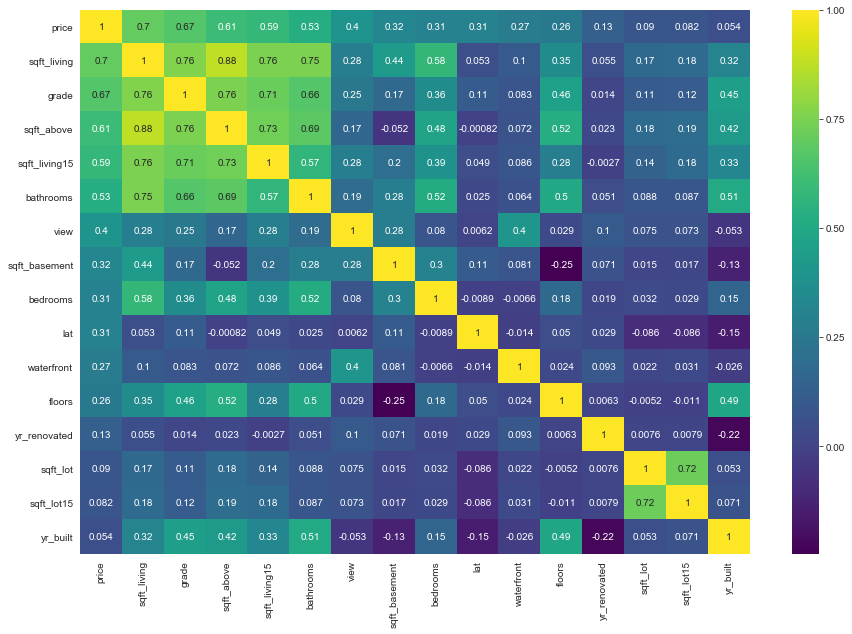

In [7]:
k = len(columns_list)
target = 'price'
figure_path = os.path.join(constans.OUTPUT_FIGURE_PATH, '03_correlation_exploration.png')
visualize.plot_check_correlation(df, k, target, figure_path)